<a href="https://colab.research.google.com/github/jantuitman/deeplearning/blob/main/Looking_at_the_components_of_word2vec_vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Looking at the components of word2vec vectors

Here we load a word2vec model and we are going to inspect the individual components of the vectors. Do they mean something? Do "concept" have identifiable components in common?

Lets have a look.

In [15]:
!pip install  gensim;
!pip install  sklearn;
!pip install  matplotlib;
!pip install  ipywidgets;
!pip install numpy;
print("dependencies are installed")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
dependencies are installed


In [16]:
from gensim.models import KeyedVectors

# Load the pre-trained word2vec model from a file
model = KeyedVectors.load_word2vec_format("model.bin", binary=True)

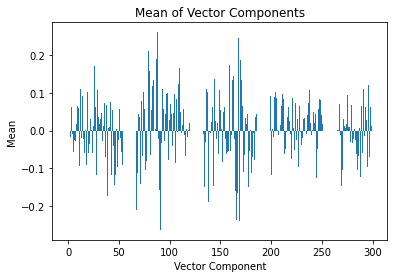

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# calculate mean of each component
mean_vectors = np.mean(model.vectors, axis=0)

# create a bar chart
plt.bar(range(len(mean_vectors)), mean_vectors)
plt.xlabel('Vector Component')
plt.ylabel('Mean')
plt.title('Mean of Vector Components')
plt.show()

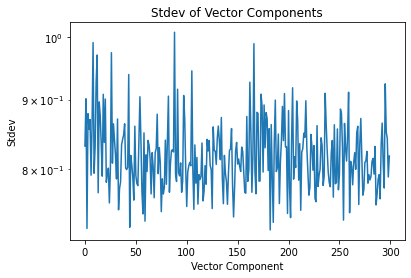

In [24]:
std_vectors = np.std(model.vectors, axis=0)

# create a bar chart
plt.semilogy(range(len(std_vectors)), std_vectors)
plt.xlabel('Vector Component')
plt.ylabel('Stdev')
plt.title('Stdev of Vector Components')
plt.show()


In [22]:
from posixpath import join
import pandas as pd

data = []
stdevs = np.std(model.vectors, axis=0)
for idx in range(300):
    vec1 = np.zeros(300)
    vec1[idx] = 1
    vec2 = np.zeros(300)
    vec2[idx] = -1
    if stdevs[idx] < 0.1:
        data.append([idx, "","", stdevs[idx]])
    else:
        similar_words = model.similar_by_vector(vec1, topn=5)
        words = [word for word,similary in similar_words]
        words_string = ', '.join(words)
        similar_words2 = model.similar_by_vector(vec2, topn=5)
        words2 = [word for word,similary in similar_words2]
        words_string2 = ', '.join(words2)
        data.append([idx, words_string, words_string2, stdevs[idx]])
        

df = pd.DataFrame(data, columns=['idx', 'positive words','negative words','stdev'])
display(df)


,idx,positive words,negative words,stdev
0,0,"even_uitwaaien, bubbelbad, sushis, last_time, ...","#rien, 62ste, twintigste, bul, vijftigste",0.832049
1,1,"festivalweekend, intents, kingsnight, grannys,...","pieter, juriaan, gert_jan, dirk, arnoud",0.901212
2,2,"jhon, plzzz, steal, vierde_wissel, #kooppleinnl","belastingaangifte, jaarrekening, nietwoningen,...",0.724037
3,3,"arrest, passageproces, crvb, elgin, amsterdams...","onderverdelen, budget_e2080_per, leuke, coitus...",0.878810
4,4,"arsenicum, aangehouden_na_vondst, antivries, s...","copywriting, leadgeneratie, vondel_txt, naamsb...",0.855840
...,...,...,...,...
295,295,"janita, kreeg, belande, lag, kwam","veiliger_verkeer, militaire_uitgaven, staatska...",0.924208
296,296,"energiearmoede, nexus_6, fietslessen, wereldwi...","koelkast_bewaren, gezeefd, ganache, afgebakken...",0.851712
297,297,"ikea_kast, prutsen, stuk_karton, mengpaneel, #...","ischgl, 1736, zillertal_arena, anne_frank_huis...",0.842944
298,298,"uitstekend_90, bernhoven, der_maarel, mooiland...","spoorwerkzaamheden, minstens, zonnebaden, week...",0.789706


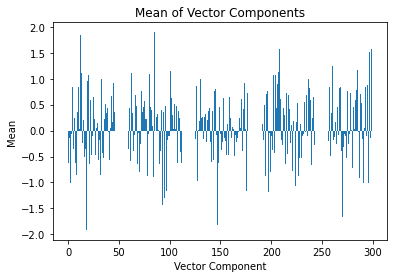

In [25]:
my_words = ["timmerman","loodgieter","bouwvakker","electricien","schilder","huisschilder","stucadoor"]
my_vecs = [model[word] for word in my_words]

# calculate mean of each component
mean_vectors = np.mean(my_vecs, axis=0)

# create a bar chart
plt.bar(range(len(mean_vectors)), mean_vectors)
plt.xlabel('Vector Component')
plt.ylabel('Mean')
plt.title('Mean of Vector Components')
plt.show()

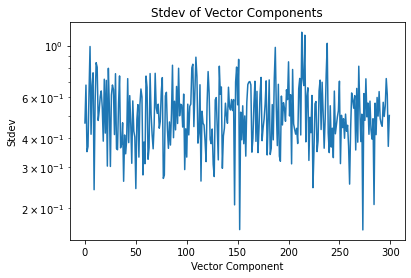

In [27]:
stdevs = np.std(my_vecs,axis=0)

# create a bar chart
plt.semilogy(range(len(stdevs)), stdevs)
plt.xlabel('Vector Component')
plt.ylabel('Stdev')
plt.title('Stdev of Vector Components')
plt.show()

In [33]:
similar_words = model.similar_by_vector(mean_vectors, topn=50)

for word, similarity in similar_words:
  print(f"{word} , {similarity}")  

timmerman , 0.8427743911743164
stukadoor , 0.79508376121521
loodgieter , 0.7827146053314209
metselaar , 0.782489001750946
stucadoor , 0.7750740051269531
elektricien , 0.7655792832374573
schilder , 0.7468488812446594
huisschilder , 0.7380949854850769
tegelzetter , 0.7310879230499268
bouwvakker , 0.7177069783210754
stratenmaker , 0.7064815759658813
electricien , 0.7051860690116882
klusjesman , 0.7044417858123779
lasser , 0.6983442902565002
dakdekker , 0.696336030960083
meubelmaker , 0.6859818696975708
tuinman , 0.6660525798797607
hovenier , 0.6629166603088379
vakman , 0.6614648103713989
automonteur , 0.6506415605545044
steigerbouwer , 0.6467926502227783
glaszetter , 0.6444834470748901
schrijnwerker , 0.6395867466926575
houtbewerker , 0.6328215599060059
glazenwasser , 0.6291148662567139
klusbedrijf , 0.6138771176338196
metaalbewerker , 0.6119931936264038
kraanmachinist , 0.6048818230628967
stoffeerder , 0.5892531871795654
verhuizer , 0.5844540596008301
cv_monteur , 0.5830608010292053
timm

In [40]:
my_words2 = ["verpleger","dokter","maatschappelijk_werkster","psycholoog","verpleegkundige","vroedvrouw","kraamverzorgster","doktersassistente","fysiotherapeut","tandarts"]
my_vecs2 = [model[word] for word in my_words2]

# calculate mean of each component
mean_vectors2 = np.mean(my_vecs2, axis=0)

similar_words2 = model.similar_by_vector(mean_vectors2, topn=50)

for word, similarity in similar_words2:

  print(f"{word} , {similarity}") 

verpleegkundige , 0.8192853927612305
arts , 0.8042070269584656
huisarts , 0.8032574653625488
dokter , 0.799031138420105
doktersassistente , 0.7876896858215332
assistente , 0.786531925201416
gynaecoloog , 0.7521408796310425
kinderarts , 0.7496321201324463
psycholoog , 0.7420059442520142
fysiotherapeut , 0.7417486906051636
chirurg , 0.736084520816803
tandarts , 0.7351102828979492
maatschappelijk_werkster , 0.7332183122634888
verloskundige , 0.7197901010513306
psychologe , 0.714828610420227
therapeut , 0.7144192457199097
verpleegster , 0.7140763998031616
internist , 0.7108839750289917
neuroloog , 0.704189121723175
psychiater , 0.6998921632766724
verpleger , 0.6974964141845703
fysiotherapeute , 0.6961022615432739
vroedvrouw , 0.6940348744392395
therapeute , 0.6936233639717102
maatschappelijk_werker , 0.6926788091659546
cardioloog , 0.691484808921814
anesthesist , 0.673052191734314
coassistent , 0.6719956398010254
geriater , 0.671646773815155
mondhygieniste , 0.671371340751648
revalidatiear

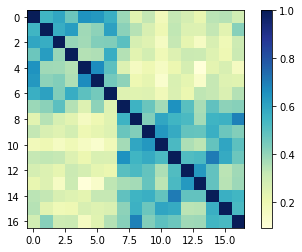

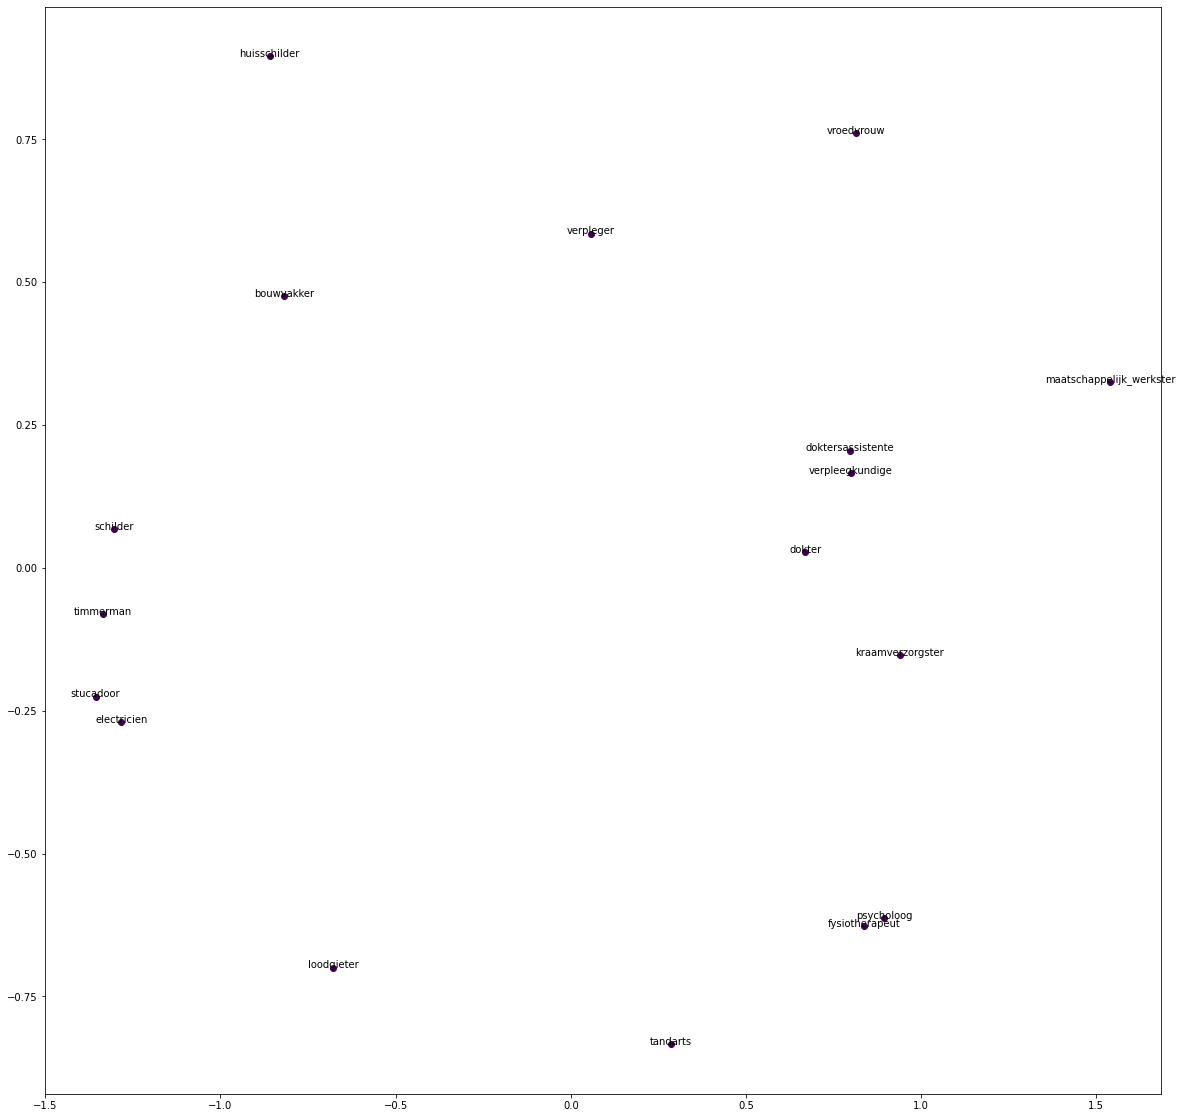

In [52]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
from sklearn.manifold import Isomap

words = my_words + my_words2


objects = [{"word": word, "vec": model[word]} for word in words if word in model]
cosine_sim = cosine_similarity([obj["vec"] for obj in objects])
plt.imshow(cosine_sim, cmap='YlGnBu')
plt.colorbar()
plt.show()

dist_matrix = 1.02 - cosine_sim / 2


isomap = Isomap(n_components=2, n_neighbors=5, metric='precomputed')
reduced_vectors = isomap.fit_transform(dist_matrix)


# Initialize the t-SNE model
#mds = MDS(n_components=2, dissimilarity='precomputed')
#reduced_vectors = mds.fit_transform(cosine_sim)

#tsne = TSNE(n_components=2, random_state=0)
#reduced_vectors = tsne.fit_transform([obj["vec"] for obj in objects])


dbscan = DBSCAN(metric='precomputed', eps=0.5, min_samples=2)
clusters = dbscan.fit_predict(dist_matrix)
# assign the 'group' property to each object
for i, obj in enumerate(objects):
    obj["group"] = clusters[i]

group_map = {i: f"C{i + 1}" for i in range(len(set(clusters)) - (1 if -1 in clusters else 0))}
fig, ax = plt.subplots(figsize=(20,20))
for obj, vec in zip(objects, reduced_vectors):
    if obj["group"] != -1:
      ax.scatter(vec[0], vec[1], c=group_map[obj["group"]])
      ax.annotate(obj["word"], (vec[0], vec[1]), ha='center')
    else:
      ax.scatter(vec[0], vec[1], c=0)  
      ax.annotate(obj["word"], (vec[0], vec[1]), ha='center')
plt.show()

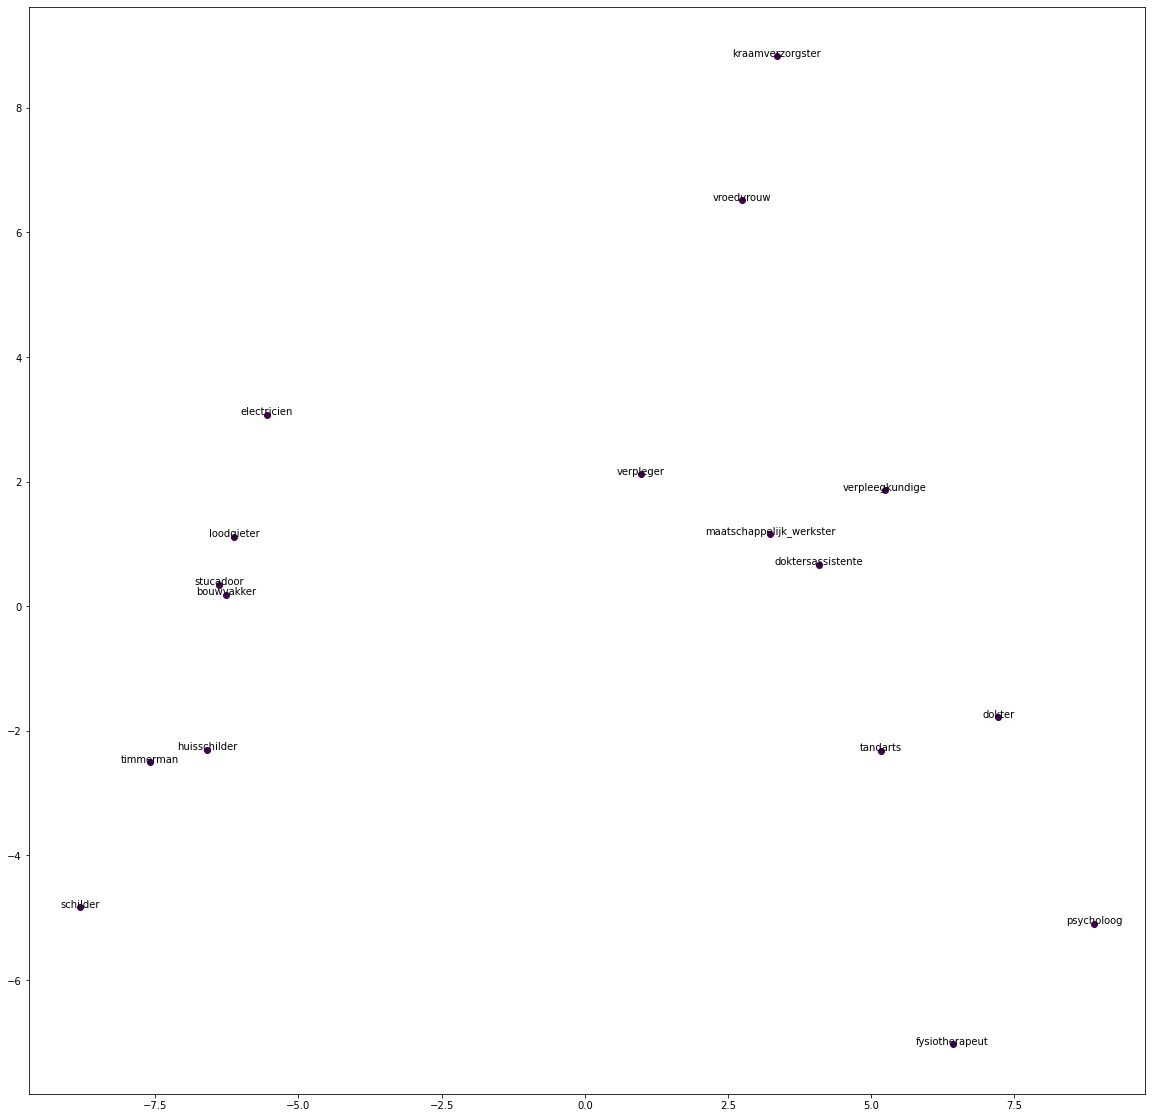

In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # specify number of components to keep
vectors_pca = pca.fit_transform([obj["vec"] for obj in objects])


fig, ax = plt.subplots(figsize=(20,20))
for obj, vec in zip(objects, vectors_pca):
  ax.scatter(vec[0], vec[1], c=0)  
  ax.annotate(obj["word"], (vec[0], vec[1]), ha='center')
plt.show()


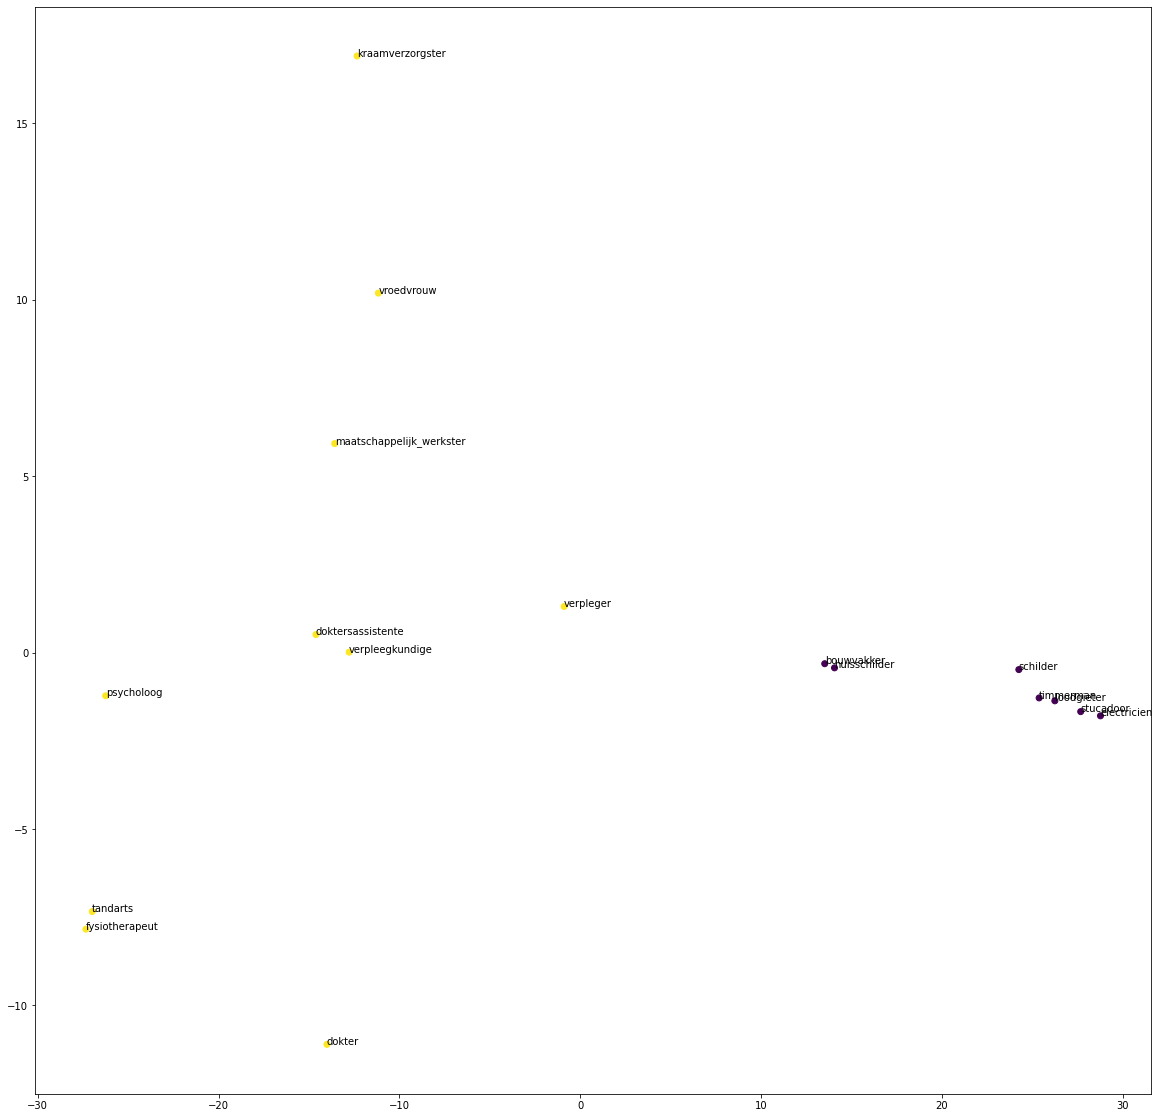

In [61]:
from sklearn.cluster import KMeans
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt

vectors = [obj["vec"] for obj in objects]
# Perform k-means clustering
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(vectors)

# Perform Isomap dimensionality reduction
isomap = Isomap(n_components=2)
vectors_2d = isomap.fit_transform(vectors)

# Plot the results
fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c=clusters)
for i, word_obj in enumerate(objects):
  plt.annotate(word_obj["word"], (vectors_2d[i, 0], vectors_2d[i, 1]))
plt.show()